# Key-Finding

This week we will discuss:

- The homework
- What is key-finding? 
- Why is it meaningful?
- What are some of the approaches scholars have taken to key-finding algorithms?
- How might they be improved in the future?

# A Brief History of Key-Finding

Key-finding has historically been closely tied with the computationalist approach to cognition. Modeling how a computer might infer the key of a piece can be an interesting problem that allows us to ask how we might be inferring keys. 

For that reason, the correct answers are interesting, but not as interesting as the process and (sometimes) the mistakes.

## Longuet-Higgins

One of the first key-finding algorithms was Longeut-Higgins' _shape-matching algorithm_ (1976), which would use the process of elimination over the course of a piece. For example, if the first note was "C", D-major, A-major, E-major, F#-major, B-major, G-flat major, _etc_ were all eliminated. If the next note was an B-natural, the choices were limited even further. 

This method worked quite well with very tonal monophonic pieces, and surprisingly it was able to get all of the keys for Bach's _Well-Tempered Clavier_.

Overall, howver, it struggled with pieces that included functional chromaticism, and polyphony, in general.

## Krumhansl-Schmuckler/Krumansl-Kessler

THe Krumhansl-Schmuckler model (1990) used a more experimental approach. It took the probe-tone ratings from an earlier experiment (Krumhansl and Kessler, 1982) to find the most likely tones in a piece.

In these probe tone experiments, participants would be presented with a cadence, followed by a tone. They would then rate the "goodness-of-fit" of each of these tones. This would generate a key-profile, that looked like this:

![krumhansl-kessler](https://raw.githubusercontent.com/shanahdt/images/main/krumhansl_kessler_from_huron2006.png)

The key-finding algorithm would take the pitch count of each piece, and then run a correlation with this profile for each key. So if the total number of pitches against this key-profile provided a correlation of .80, and the others provided a correlation of .76, .74, etc. the highest number would be taken as the correct key. We might call this a **correlational** approach to key-finding.

The algorithms below use this approach, as well, but whereas this model uses the ratings from an experiment, the others use specific corpora. 

## Aarden-Essen

Bret Aarden (2003), for example, collected the pitch count of the entire Essen Folksong Collection (Schaffrath, 1995). His argument was that the "relationship between 'key-profile' and musical structure' is not as straightforwad as is often assumed." Real musical data, he argued, is more in line with what people have been exposed to.

## Bellman-Budge

Bellman (2005) used a corpus curated by Helen Budge's stydy if chord frequencies of 18th and 19th century composers.(1943) It's a correlational model, but with Western Art Music.

## Temperley-Kostka/Payne

Temperley (2001) curated the Kostka-Payne corpus, which included all of the musical examples from the Kostka-Payne textbook. 

## Craig Sapp's Simple Weightings

Sapp (2011) proposed a simple set of scale degree weights to be used with the Krumhansl-Schmuckler algorithm, con- sisting of only 2 (for tonic and dominant, 1 (for other diatonic tones), and 0 (for non-diatonic tones). 

Despite the fact that it is technically using "less information", the algorithm outperfoms the Krumhansl-Schmuckler algorithm, and many others.

## Results

Here is a table of results (from Albrecht and Shanahan, 2013):

![key-finding-accuracy](https://raw.githubusercontent.com/shanahdt/images/main/key-finding_results_albrecht_shanahan_2013.png)



# A "Bag of Notes"?

The above stated methods are often collectively called a "bag-of-notes" approach. They put all pitches into a a big bag, not caring about context, or which tones move to another, or how they are placed metrically, and often that tonicizations, modulations, and middle sections just come out in the wash.


## Keyscapes

Craig Sapp has implemented what he calls "keyscapes", which look at windows throughout the piece. Rather than looking at a single correlation score, it looks at the best possible option through the lens of smaller windows (i.e. 4 measures, 8-measures, _etc_.) This allows for a more thorough understanding of the tonal structure of the piece, and a visualization of these changes, like so:

![sapp-keyscapes](https://upload.wikimedia.org/wikipedia/commons/4/42/Keyscape_%2B_Musescore%2C_hacking_with_Craig_Sapp.jpg)


### Exercise \#1

- Display each melody in the polska collection, followed by the key determined by the Krumhansl-Schmuckler, Aarden, Bellman-Budge, Temperley-K/P, and Sapp algorithms.



In [ ]:
#@title Setting up music21 in the background. { form-width: "30%" }
# !pip install --upgrade music21
#!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
# !apt-get update
!apt-get install musescore
!apt-get install xvfb
import os
os.putenv('DISPALY', ':99.0')
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'
!sh -e /etc/init.d/x11-common start


In [ ]:
###Let's set the google drive up so that we can access those polska files...
from google.colab import drive
import glob
import pandas as pd
drive.mount('content', force_remount=True)

Mounted at content


In [ ]:
### importing all of the polska files.

#### grab all the polska melodies. Perhaps call it file_list.

def filebrowser(ext="content/MyDrive/python_scratch/polska/*.krn"):
    "Returns files with an extension"
    return[f for f in glob.glob(f'*{ext}')]

file_list = filebrowser()

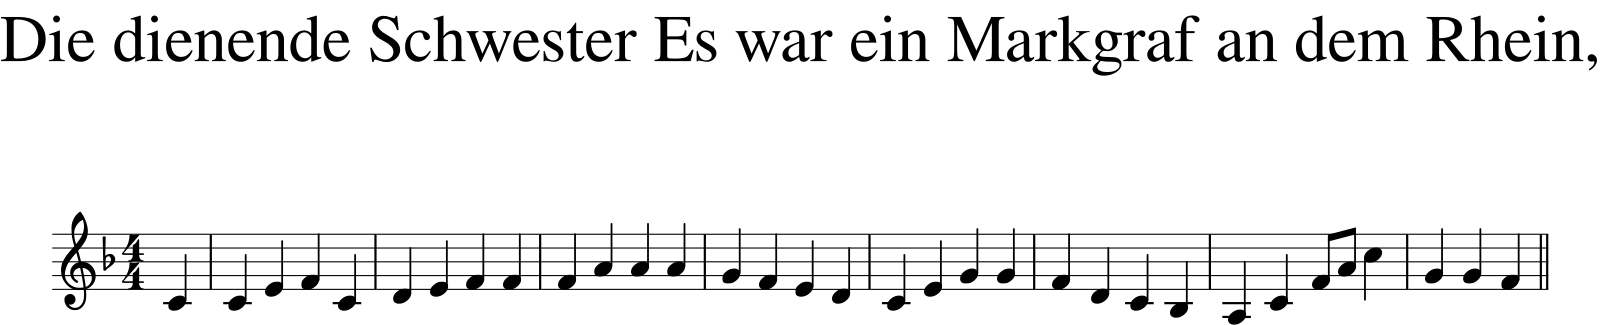

Krumhansl-Kessler: C major
Aarden Essen: F major
Bellman-Budge: F major
Temperley-Kostka-Payne: F major
Sapp Simple-Weightings: F major
-------------





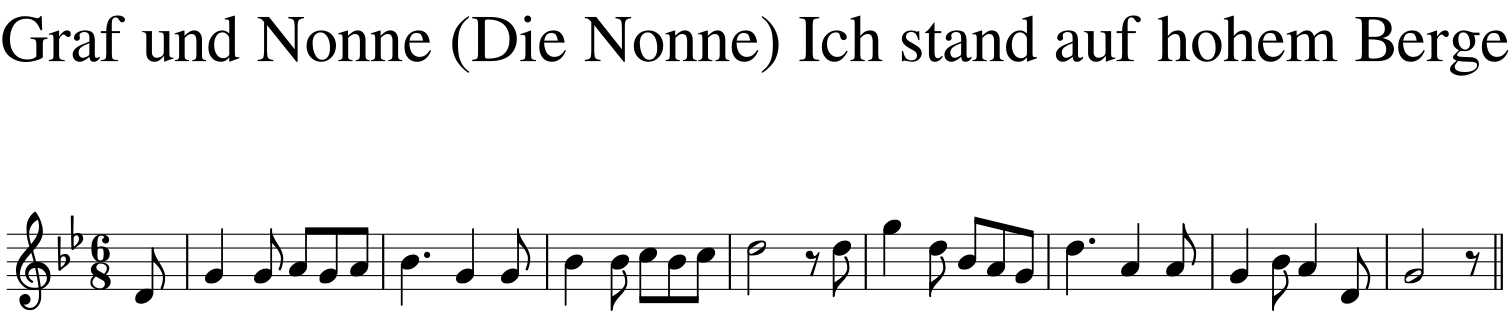

Krumhansl-Kessler: g minor
Aarden Essen: g minor
Bellman-Budge: g minor
Temperley-Kostka-Payne: g minor
Sapp Simple-Weightings: g minor
-------------





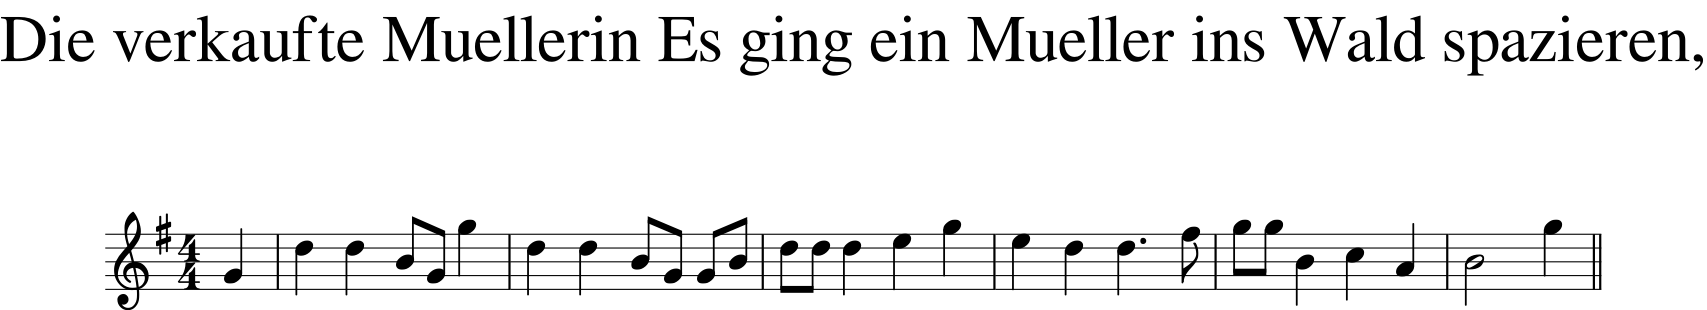

Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: G major
-------------





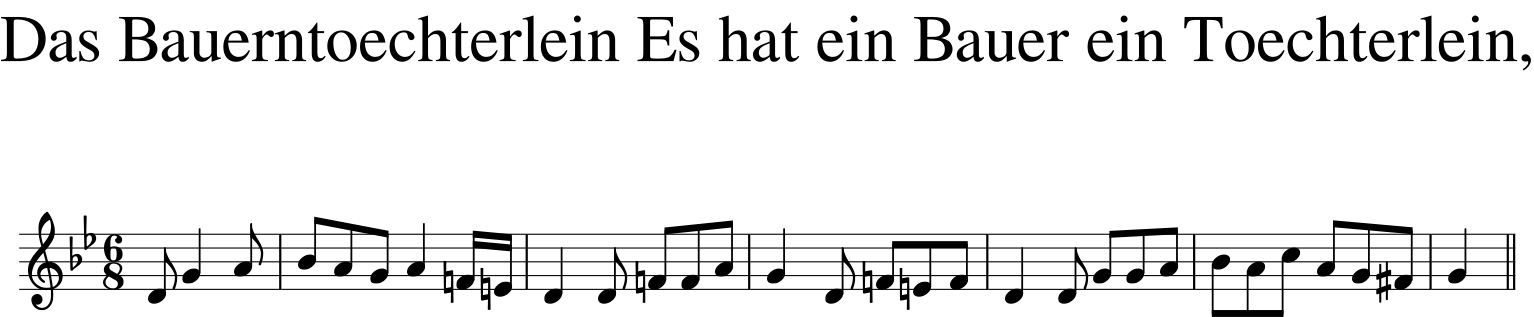

Krumhansl-Kessler: d minor
Aarden Essen: d minor
Bellman-Budge: d minor
Temperley-Kostka-Payne: d minor
Sapp Simple-Weightings: d minor
-------------





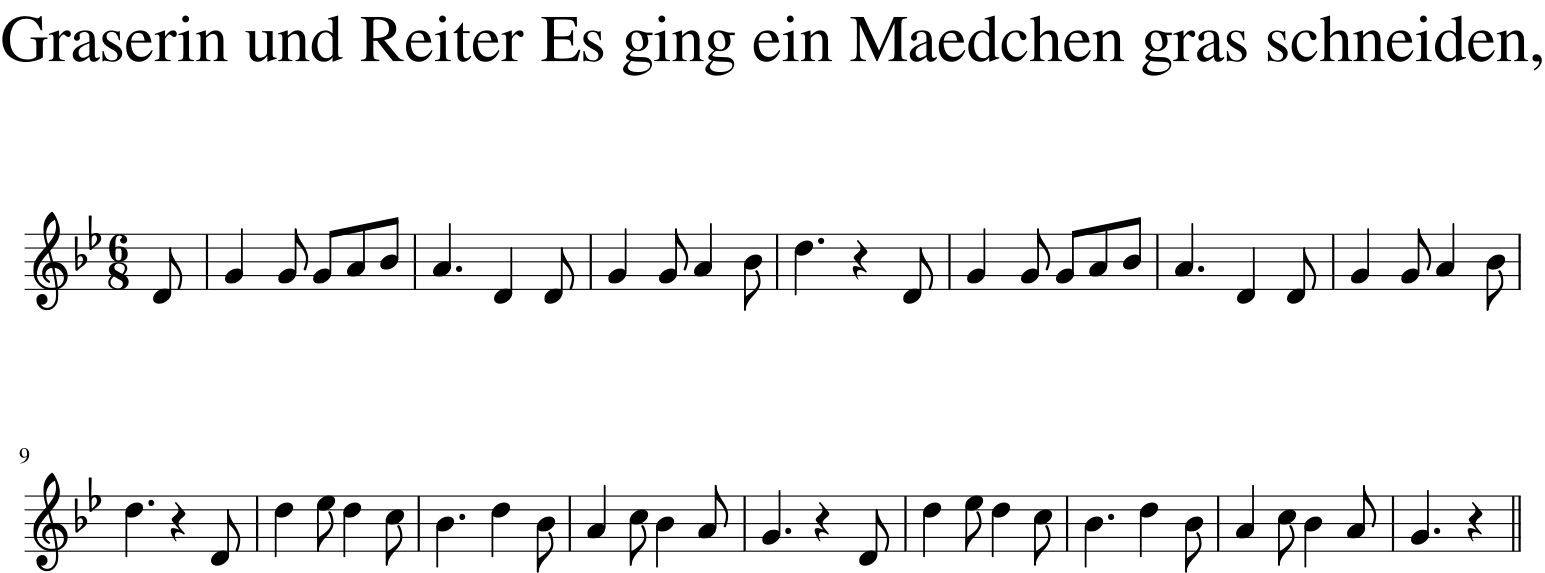

Krumhansl-Kessler: g minor
Aarden Essen: g minor
Bellman-Budge: g minor
Temperley-Kostka-Payne: g minor
Sapp Simple-Weightings: g minor
-------------





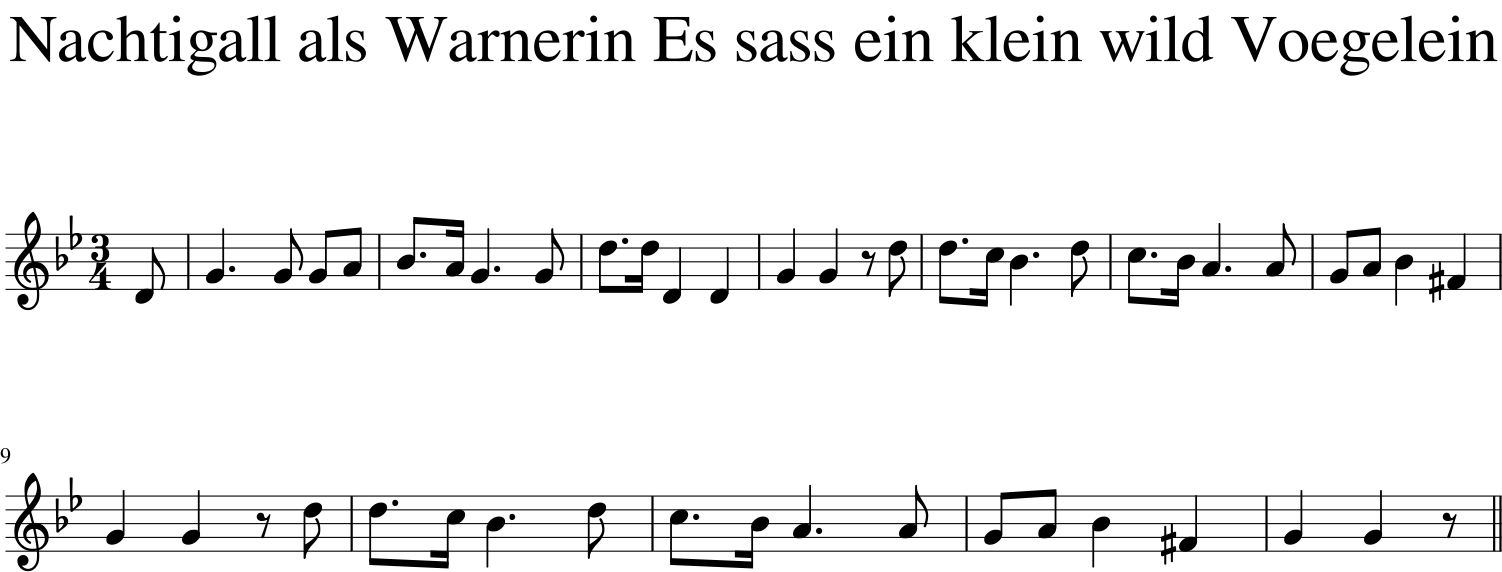

Krumhansl-Kessler: g minor
Aarden Essen: g minor
Bellman-Budge: g minor
Temperley-Kostka-Payne: g minor
Sapp Simple-Weightings: g minor
-------------





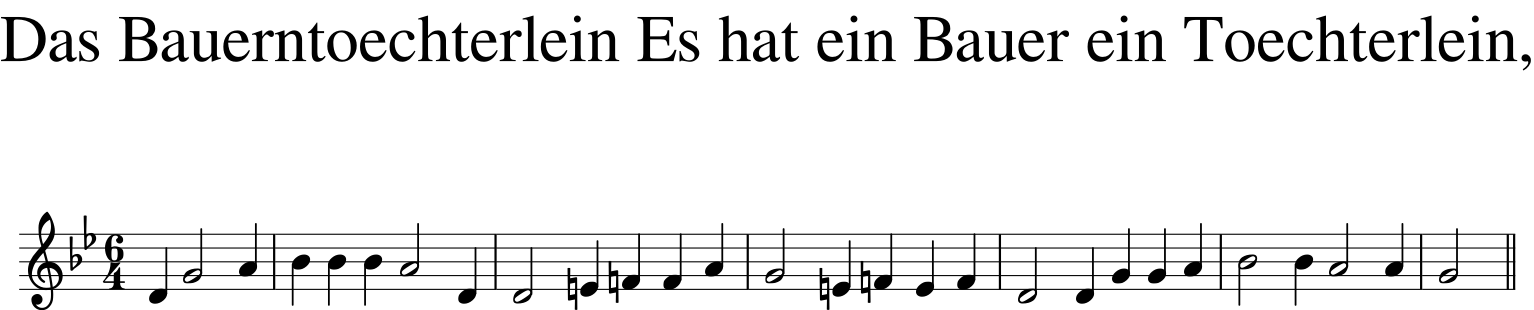

Krumhansl-Kessler: d minor
Aarden Essen: d minor
Bellman-Budge: d minor
Temperley-Kostka-Payne: d minor
Sapp Simple-Weightings: d minor
-------------





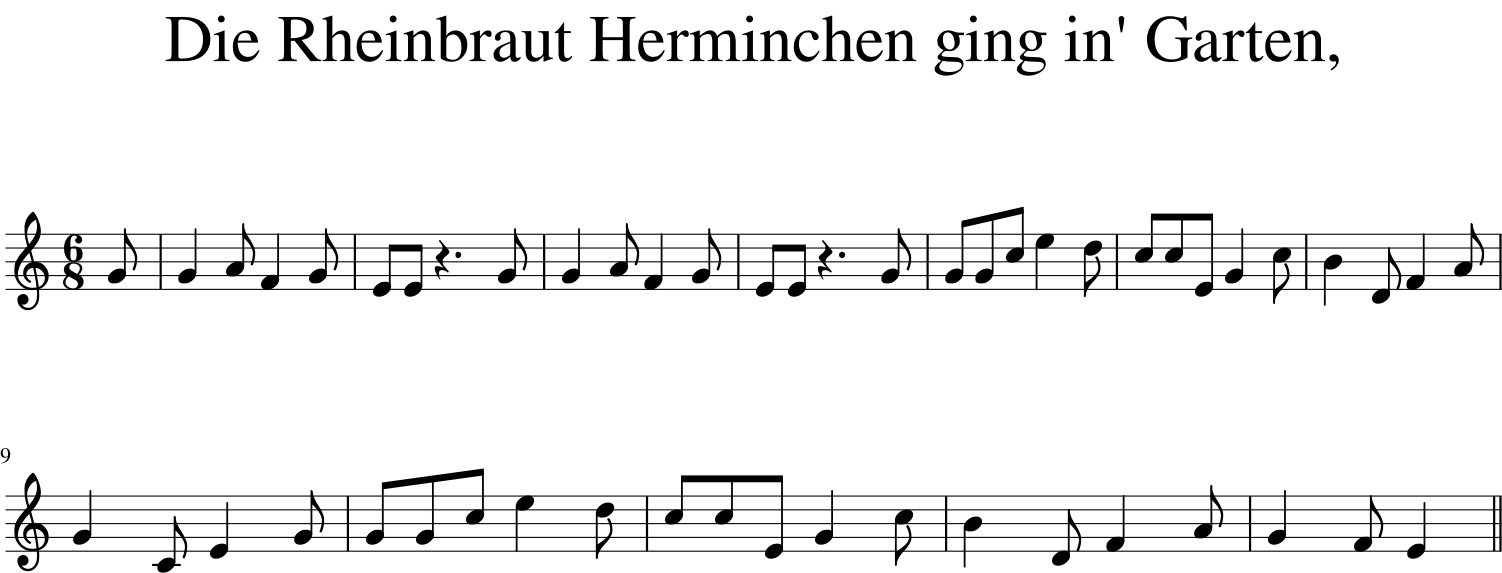

Krumhansl-Kessler: C major
Aarden Essen: C major
Bellman-Budge: C major
Temperley-Kostka-Payne: C major
Sapp Simple-Weightings: C major
-------------





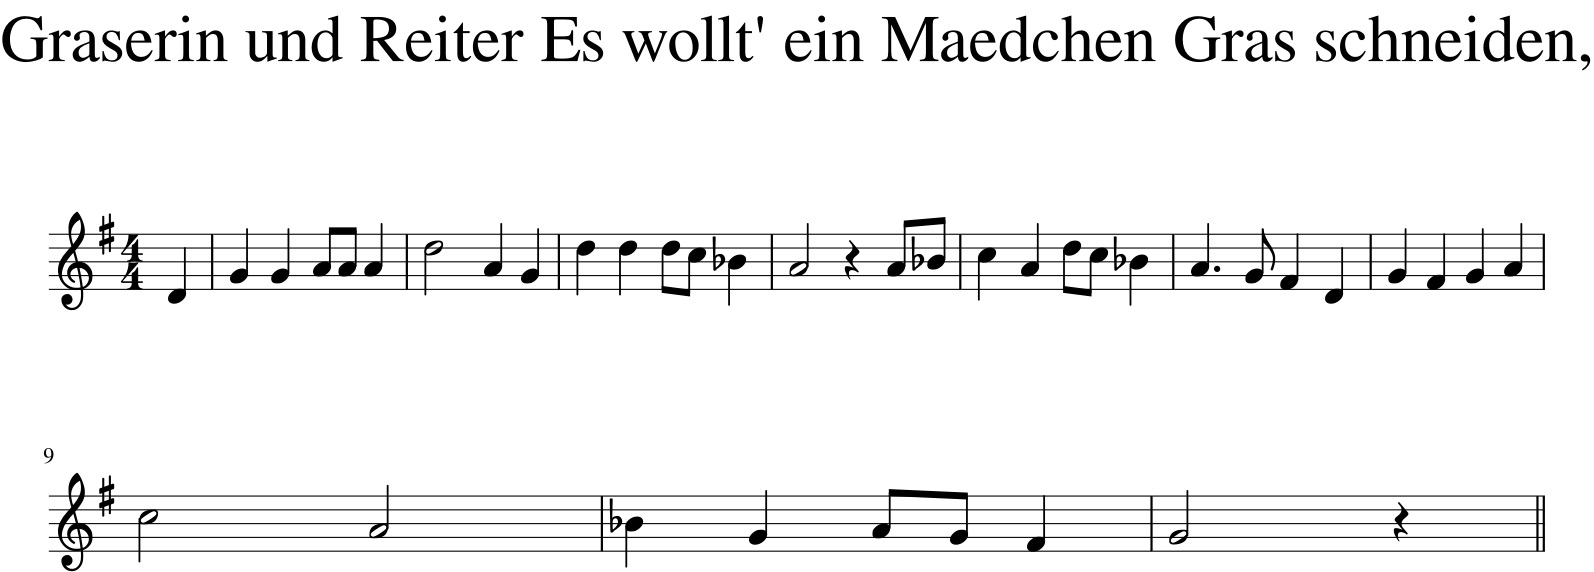

Krumhansl-Kessler: D major
Aarden Essen: g minor
Bellman-Budge: g minor
Temperley-Kostka-Payne: g minor
Sapp Simple-Weightings: g minor
-------------





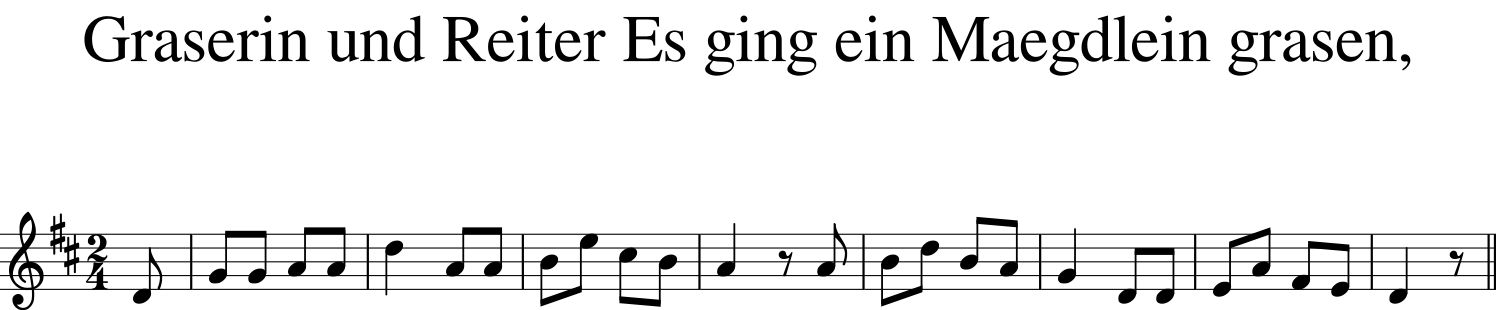

Krumhansl-Kessler: D major
Aarden Essen: G major
Bellman-Budge: D major
Temperley-Kostka-Payne: D major
Sapp Simple-Weightings: D major
-------------





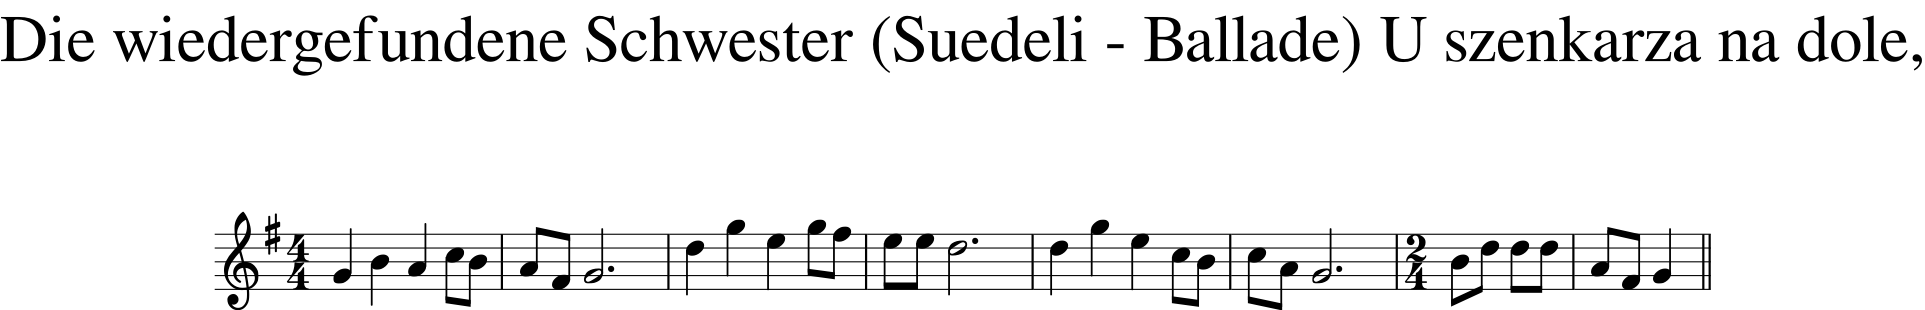

Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: G major
-------------





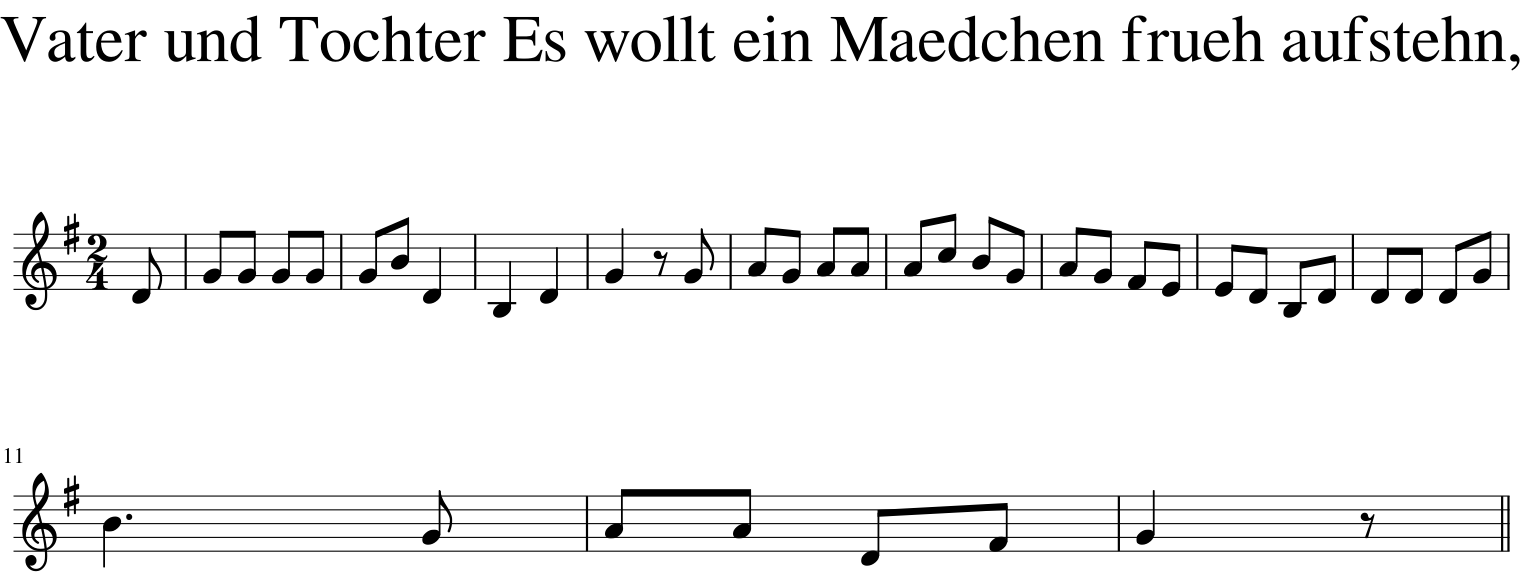

Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: G major
-------------





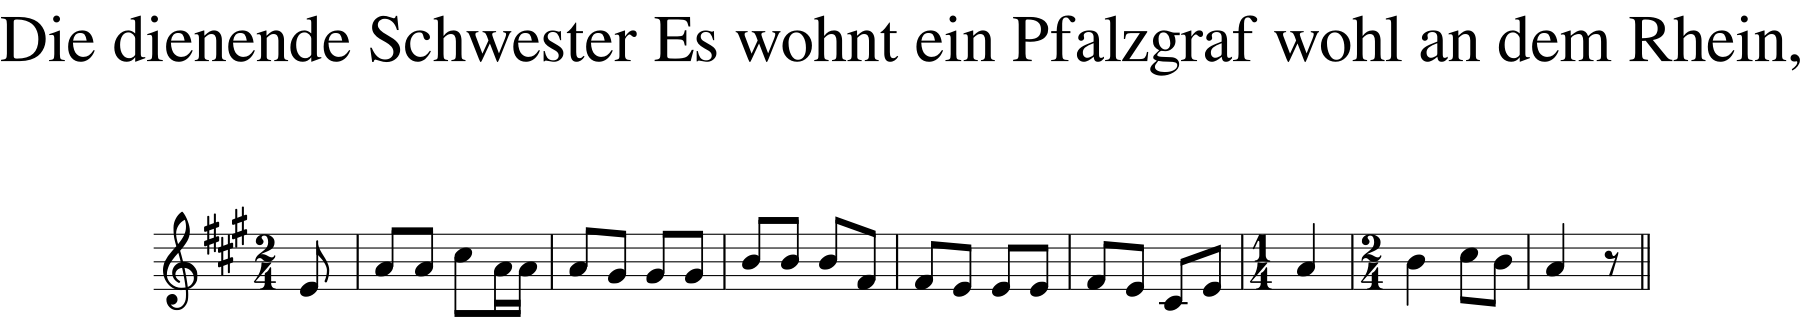

Krumhansl-Kessler: E major
Aarden Essen: A major
Bellman-Budge: A major
Temperley-Kostka-Payne: A major
Sapp Simple-Weightings: A major
-------------





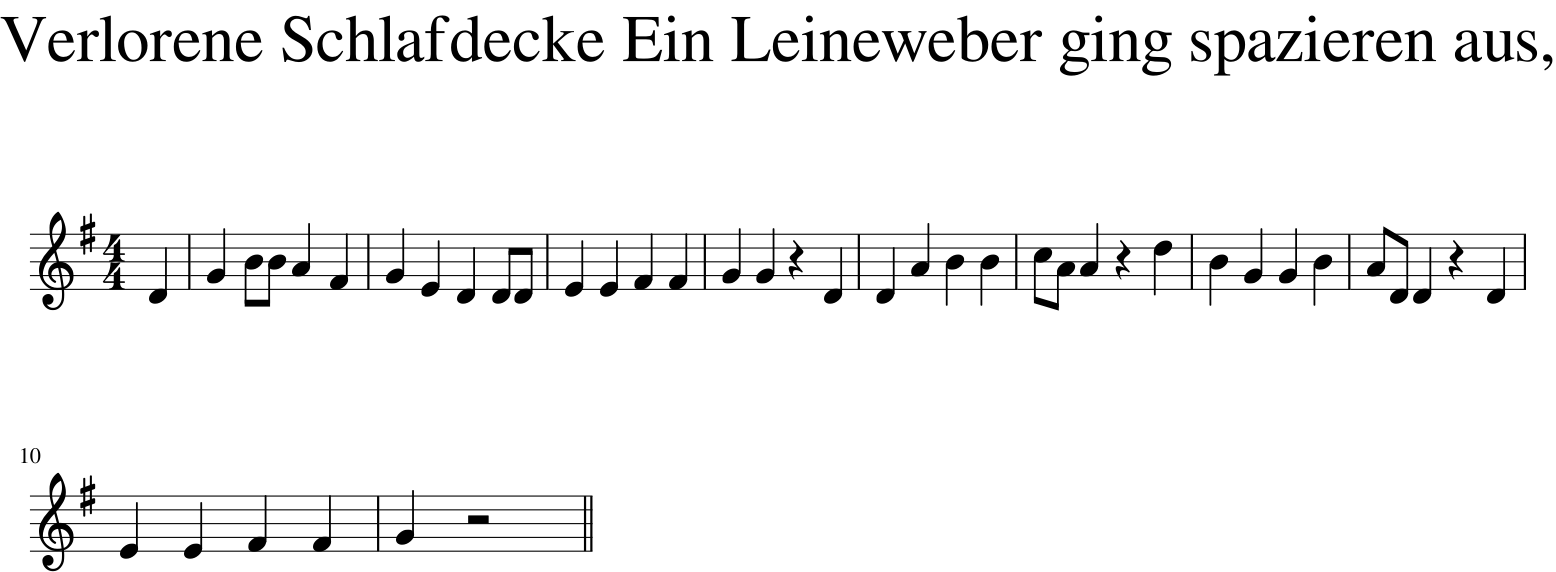

Krumhansl-Kessler: D major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: G major
-------------





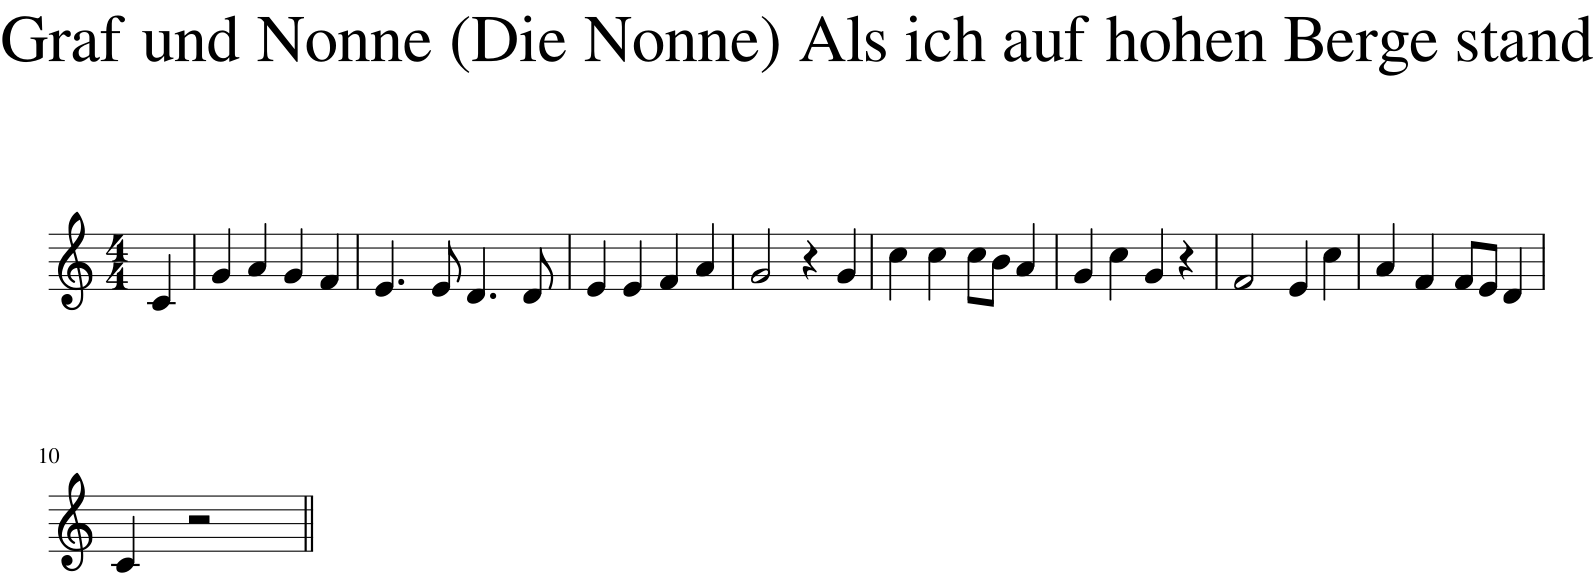

Krumhansl-Kessler: C major
Aarden Essen: C major
Bellman-Budge: C major
Temperley-Kostka-Payne: C major
Sapp Simple-Weightings: C major
-------------





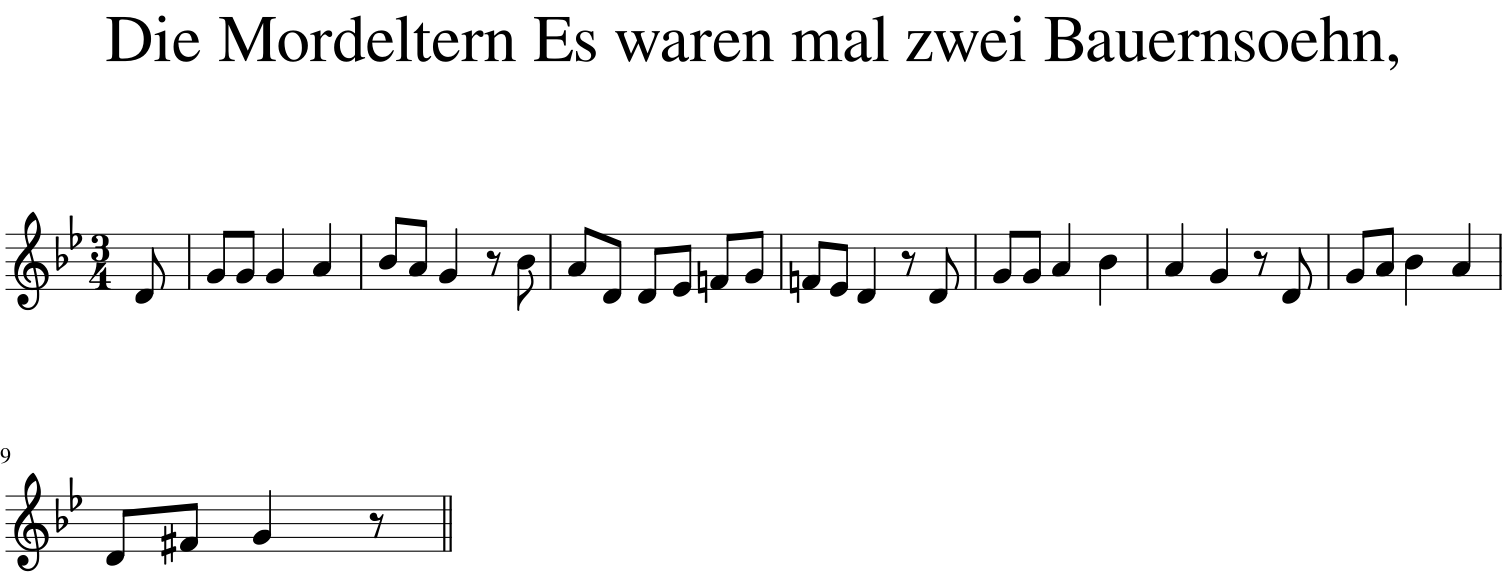

Krumhansl-Kessler: g minor
Aarden Essen: g minor
Bellman-Budge: g minor
Temperley-Kostka-Payne: g minor
Sapp Simple-Weightings: g minor
-------------





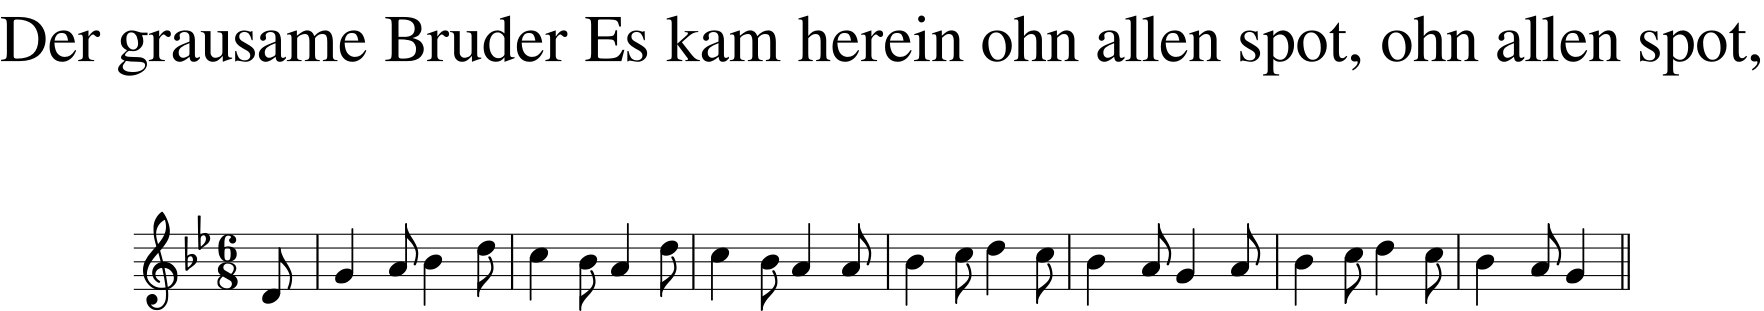

Krumhansl-Kessler: g minor
Aarden Essen: g minor
Bellman-Budge: g minor
Temperley-Kostka-Payne: g minor
Sapp Simple-Weightings: g minor
-------------





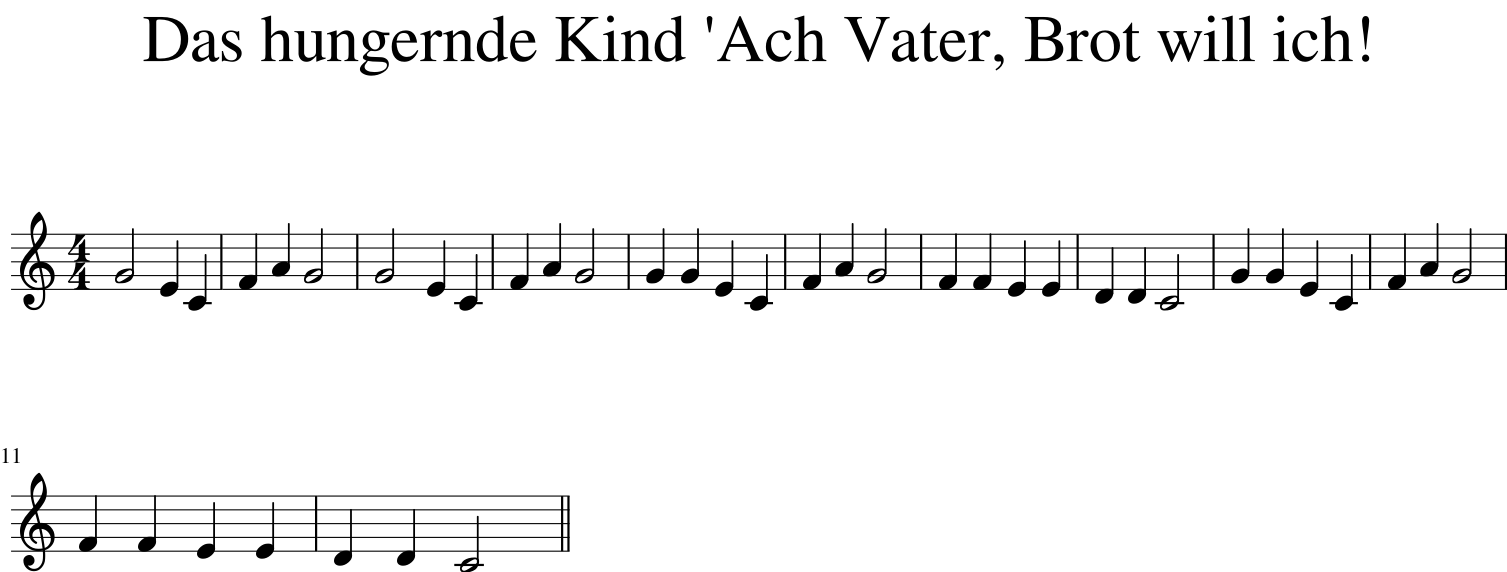

Krumhansl-Kessler: C major
Aarden Essen: C major
Bellman-Budge: C major
Temperley-Kostka-Payne: C major
Sapp Simple-Weightings: C major
-------------





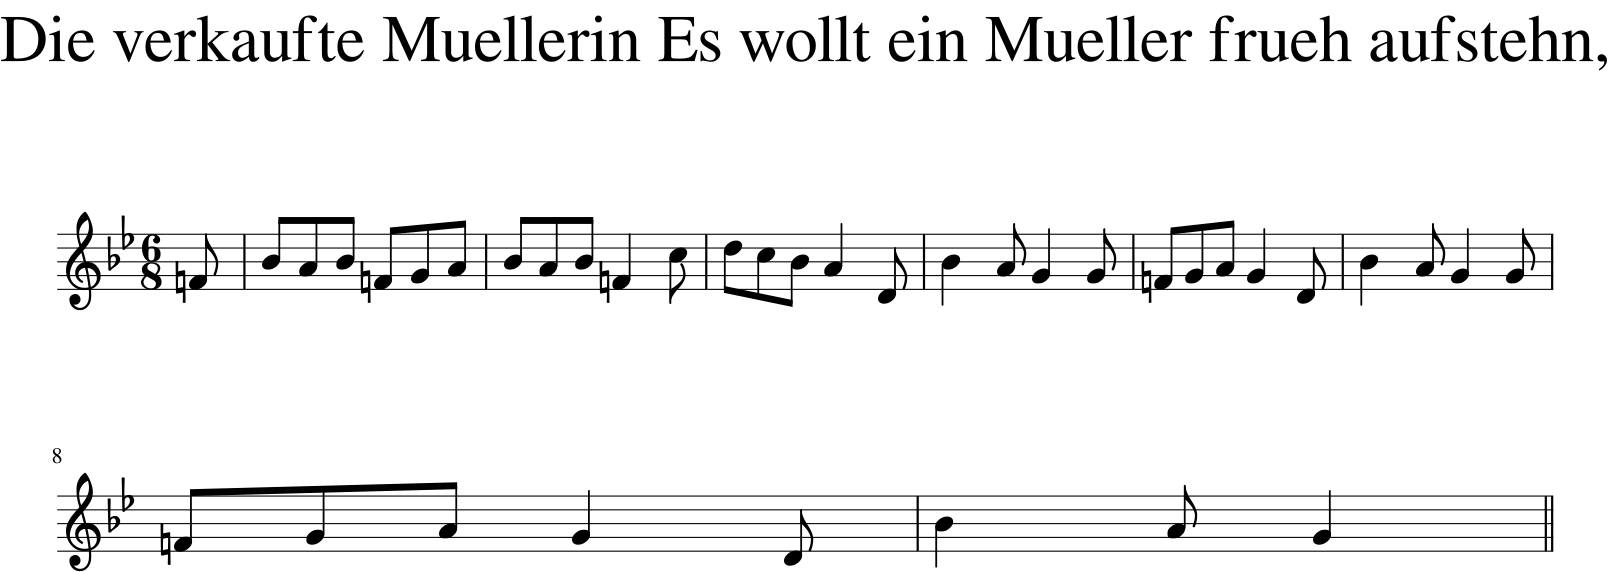

Krumhansl-Kessler: g minor
Aarden Essen: g minor
Bellman-Budge: g minor
Temperley-Kostka-Payne: g minor
Sapp Simple-Weightings: g minor
-------------





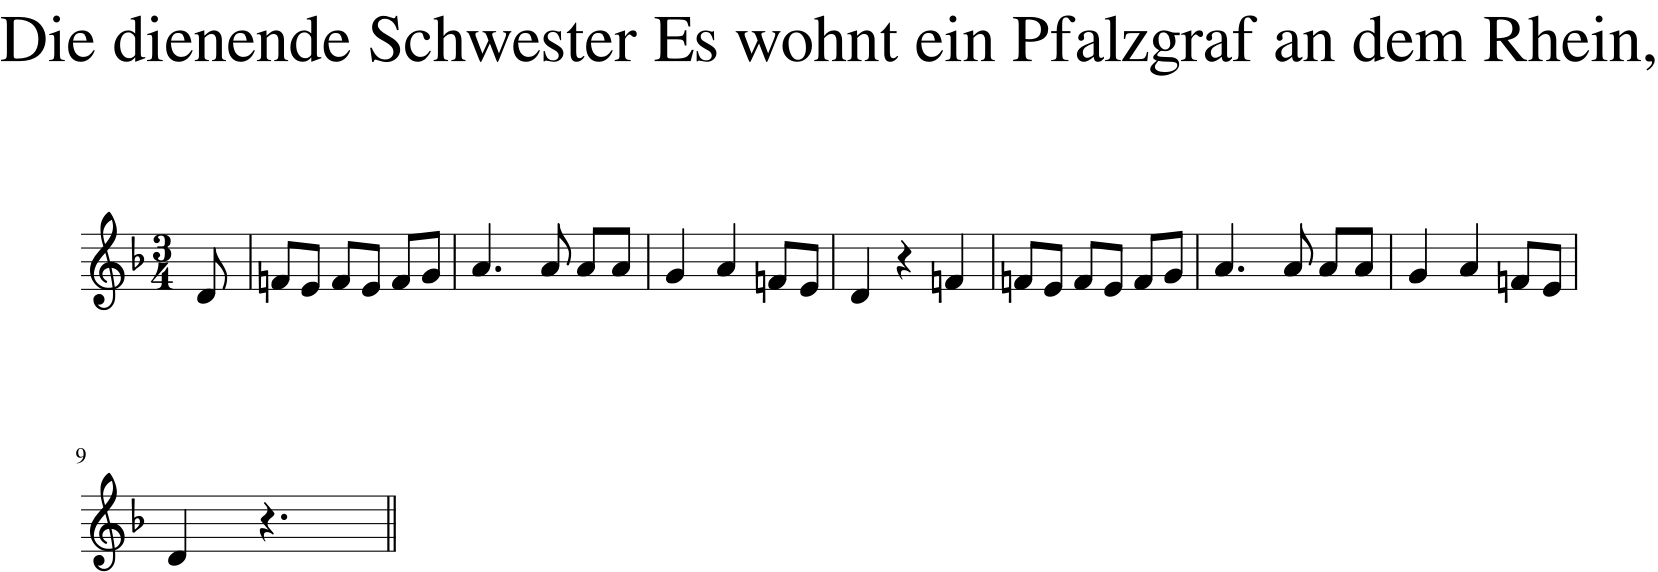

Krumhansl-Kessler: a minor
Aarden Essen: d minor
Bellman-Budge: d minor
Temperley-Kostka-Payne: d minor
Sapp Simple-Weightings: d minor
-------------





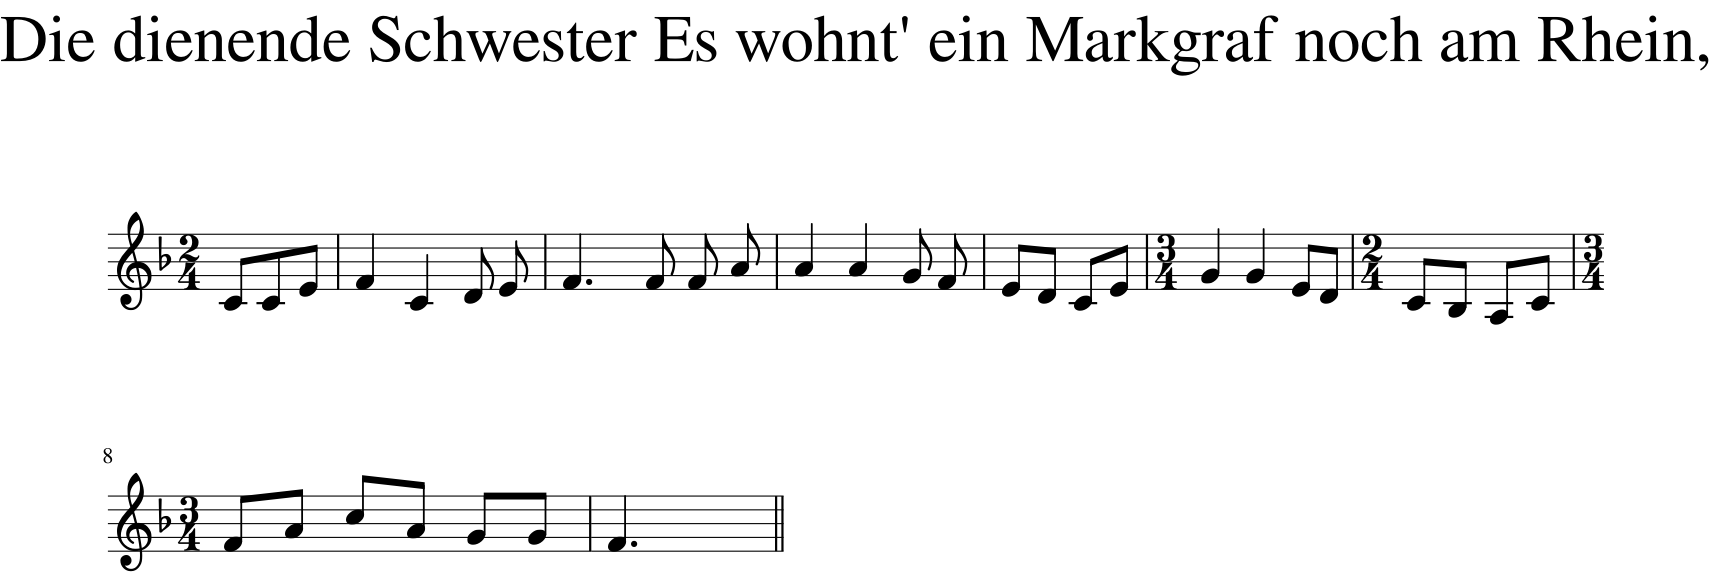

Krumhansl-Kessler: F major
Aarden Essen: F major
Bellman-Budge: F major
Temperley-Kostka-Payne: F major
Sapp Simple-Weightings: F major
-------------





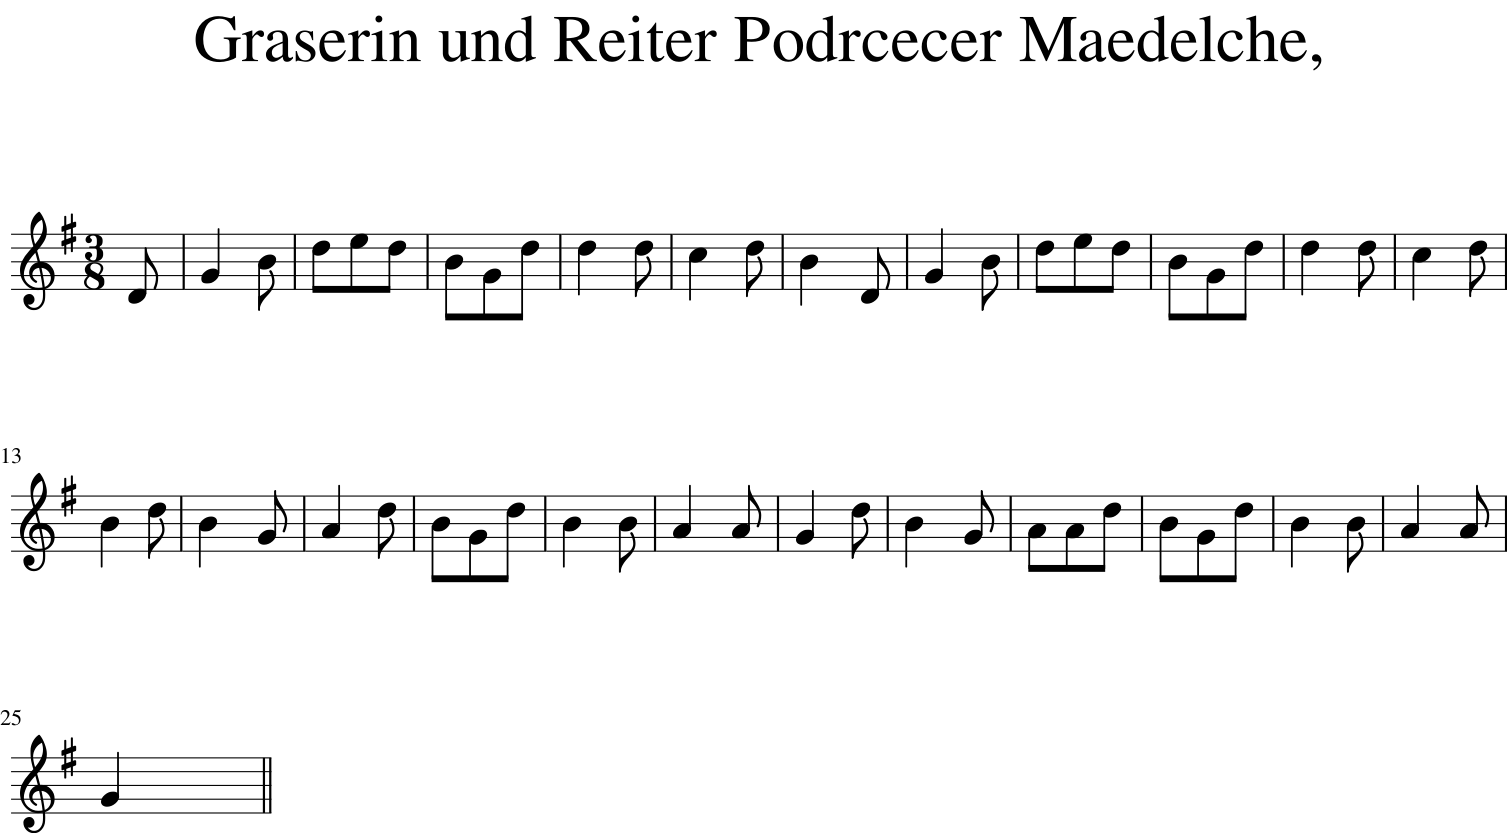

Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: G major
-------------





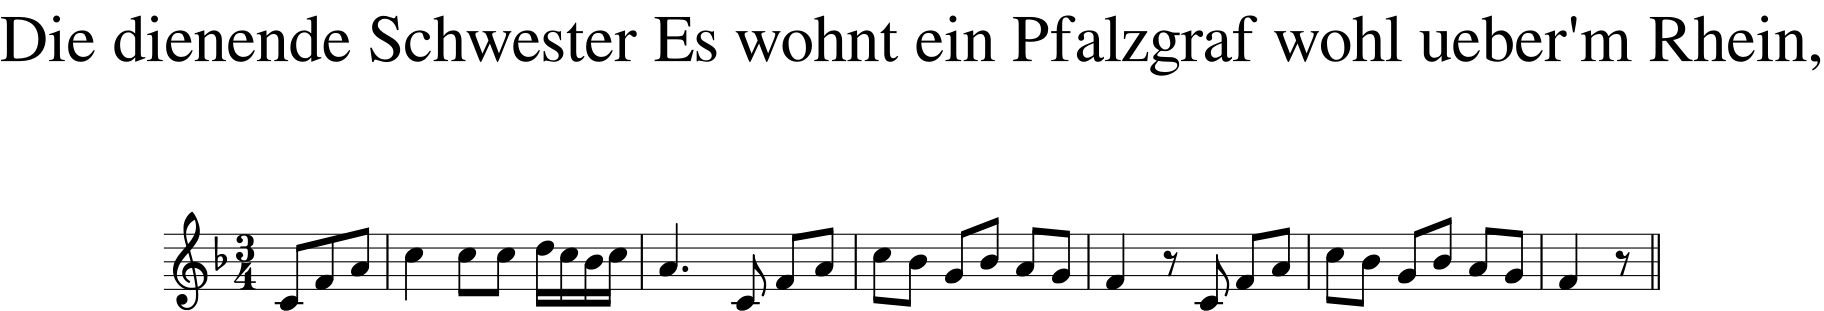

Krumhansl-Kessler: F major
Aarden Essen: F major
Bellman-Budge: F major
Temperley-Kostka-Payne: F major
Sapp Simple-Weightings: F major
-------------





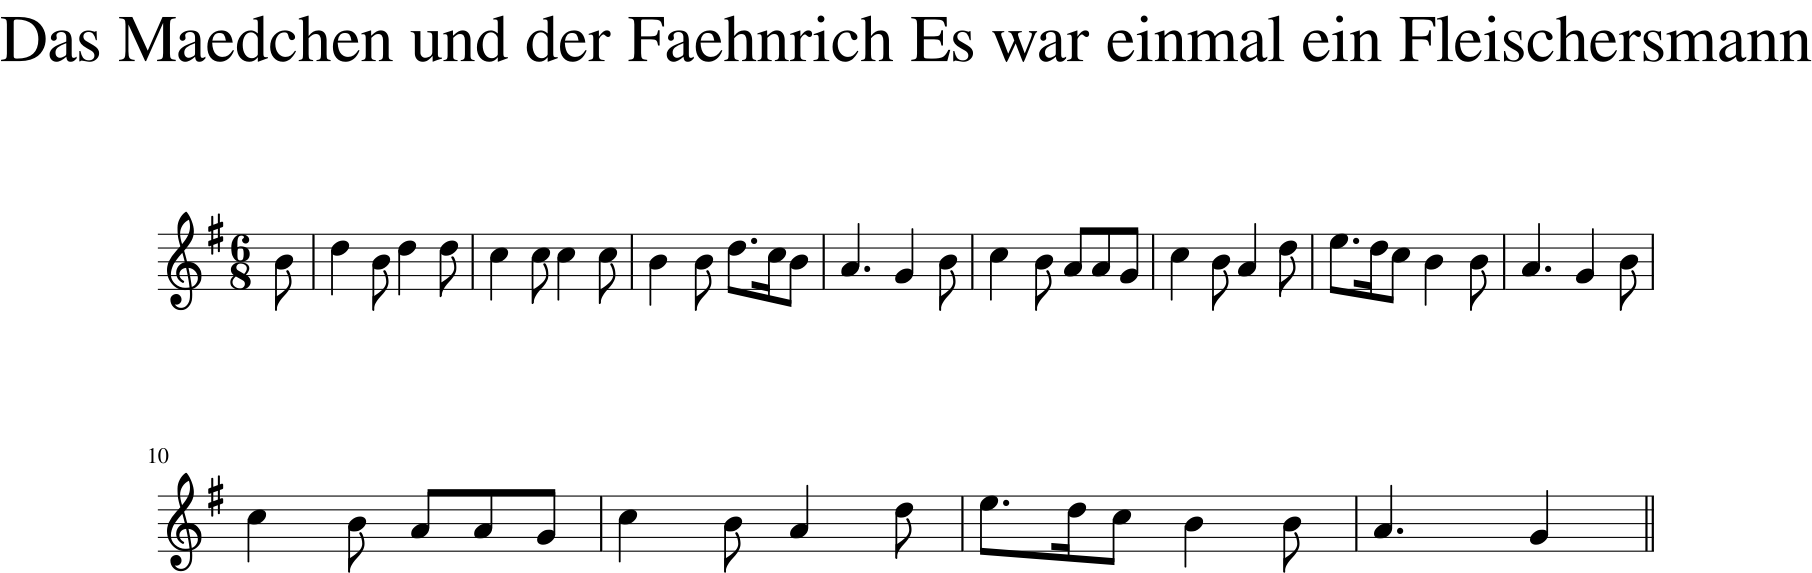

Krumhansl-Kessler: a minor
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: C major
-------------





In [ ]:
### your code here.

for kern_file in file_list:

  melody = converter.parse(kern_file)       
  krum = analysis.discrete.KrumhanslKessler(melody)
  krum_key = krum.getSolution(melody)
  
  aarden = analysis.discrete.AardenEssen(melody)
  aarden_key = aarden.getSolution(melody)

  bellman = analysis.discrete.BellmanBudge(melody)
  bellman_key = bellman.getSolution(melody)

  temperley = analysis.discrete.TemperleyKostkaPayne(melody)
  temperley_key = temperley.getSolution(melody)

  sapp = analysis.discrete.SimpleWeights(melody)
  sapp_key = sapp.getSolution(melody)

  ###show melody.
  melody.show()

  #### print answer
  print(f'Krumhansl-Kessler: {krum_key}\nAarden Essen: {aarden_key}\nBellman-Budge: {bellman_key}\nTemperley-Kostka-Payne: {temperley_key}\nSapp Simple-Weightings: {sapp_key}\n-------------\n\n\n')


## Exercise \#2

- Put all of the keys for the Bach Chorales in separate arrays, so we can examine the decisions in table form.

In [ ]:
def filebrowser(ext="content/MyDrive/python_scratch/bach_chorales/*.krn"):
    "Returns files with an extension"
    return[f for f in glob.glob(f'*{ext}')]

chorales = filebrowser()


In [ ]:
from music21 import *
#### your code here.
krum_kess= []
aarden_essen = []
temperley_kp = []
bellman_budge = []
sapp_weighted = []
titles = []

for i in chorales:
  
  titles.append(i.split("/")[-1])
  melody = converter.parse(i)

  krum = analysis.discrete.KrumhanslKessler(melody)
  krum_key = krum.getSolution(melody)
  krum_kess.append(krum_key)

  aarden = analysis.discrete.AardenEssen(melody)
  aarden_key = aarden.getSolution(melody)
  aarden_essen.append(aarden_key)
  
  bellman = analysis.discrete.BellmanBudge(melody)
  bellman_key = bellman.getSolution(melody)
  bellman_budge.append(bellman_key)

  sapp = analysis.discrete.SimpleWeights(melody)
  sapp_key = sapp.getSolution(melody)
  sapp_weighted.append(sapp_key)
  
  temperley = analysis.discrete.TemperleyKostkaPayne(melody)
  temperley_key = temperley.getSolution(melody)
  temperley_kp.append(temperley_key)


In [ ]:
import pandas as pd
pd.set_option('max_rows', 371)
df = pd.DataFrame(list(zip(titles, krum_kess, aarden_essen, bellman_budge, sapp_weighted, temperley_kp)), columns= ['Chorale','Krumhansl-Kessler', 'Aarden-Essen', 'Bellman-Budge', 'Sapp Weighted', 'Temperley-KP'])

# Wednesday

## Today's Plan

- Check in on projects. (How can we help?)
- Work through more details of key-finding.
> - How can we look at more detailed analyses of key?
> - How do we interpret keys that are more ambiguous?
- Practice getting this data (and using a function).

## Windowed Graphs

On Monday, we discussed keys in terms of single answers, and briefly discussed Craig Sapp's notion of keyscapes. music21 implements [something similar](https://web.mit.edu/music21/doc/moduleReference/moduleGraphPrimitives.html#graphcolorgrid), which allows you to see the key is being determined throughout the piece. 

In this version, it's a little bit more rigid Sapp's original triangle version, showing the key key determination of a certain section when the notes from a quarter note are included, half note, whole, measure, two measures, four measures, and the entire piece.



chor246.krn


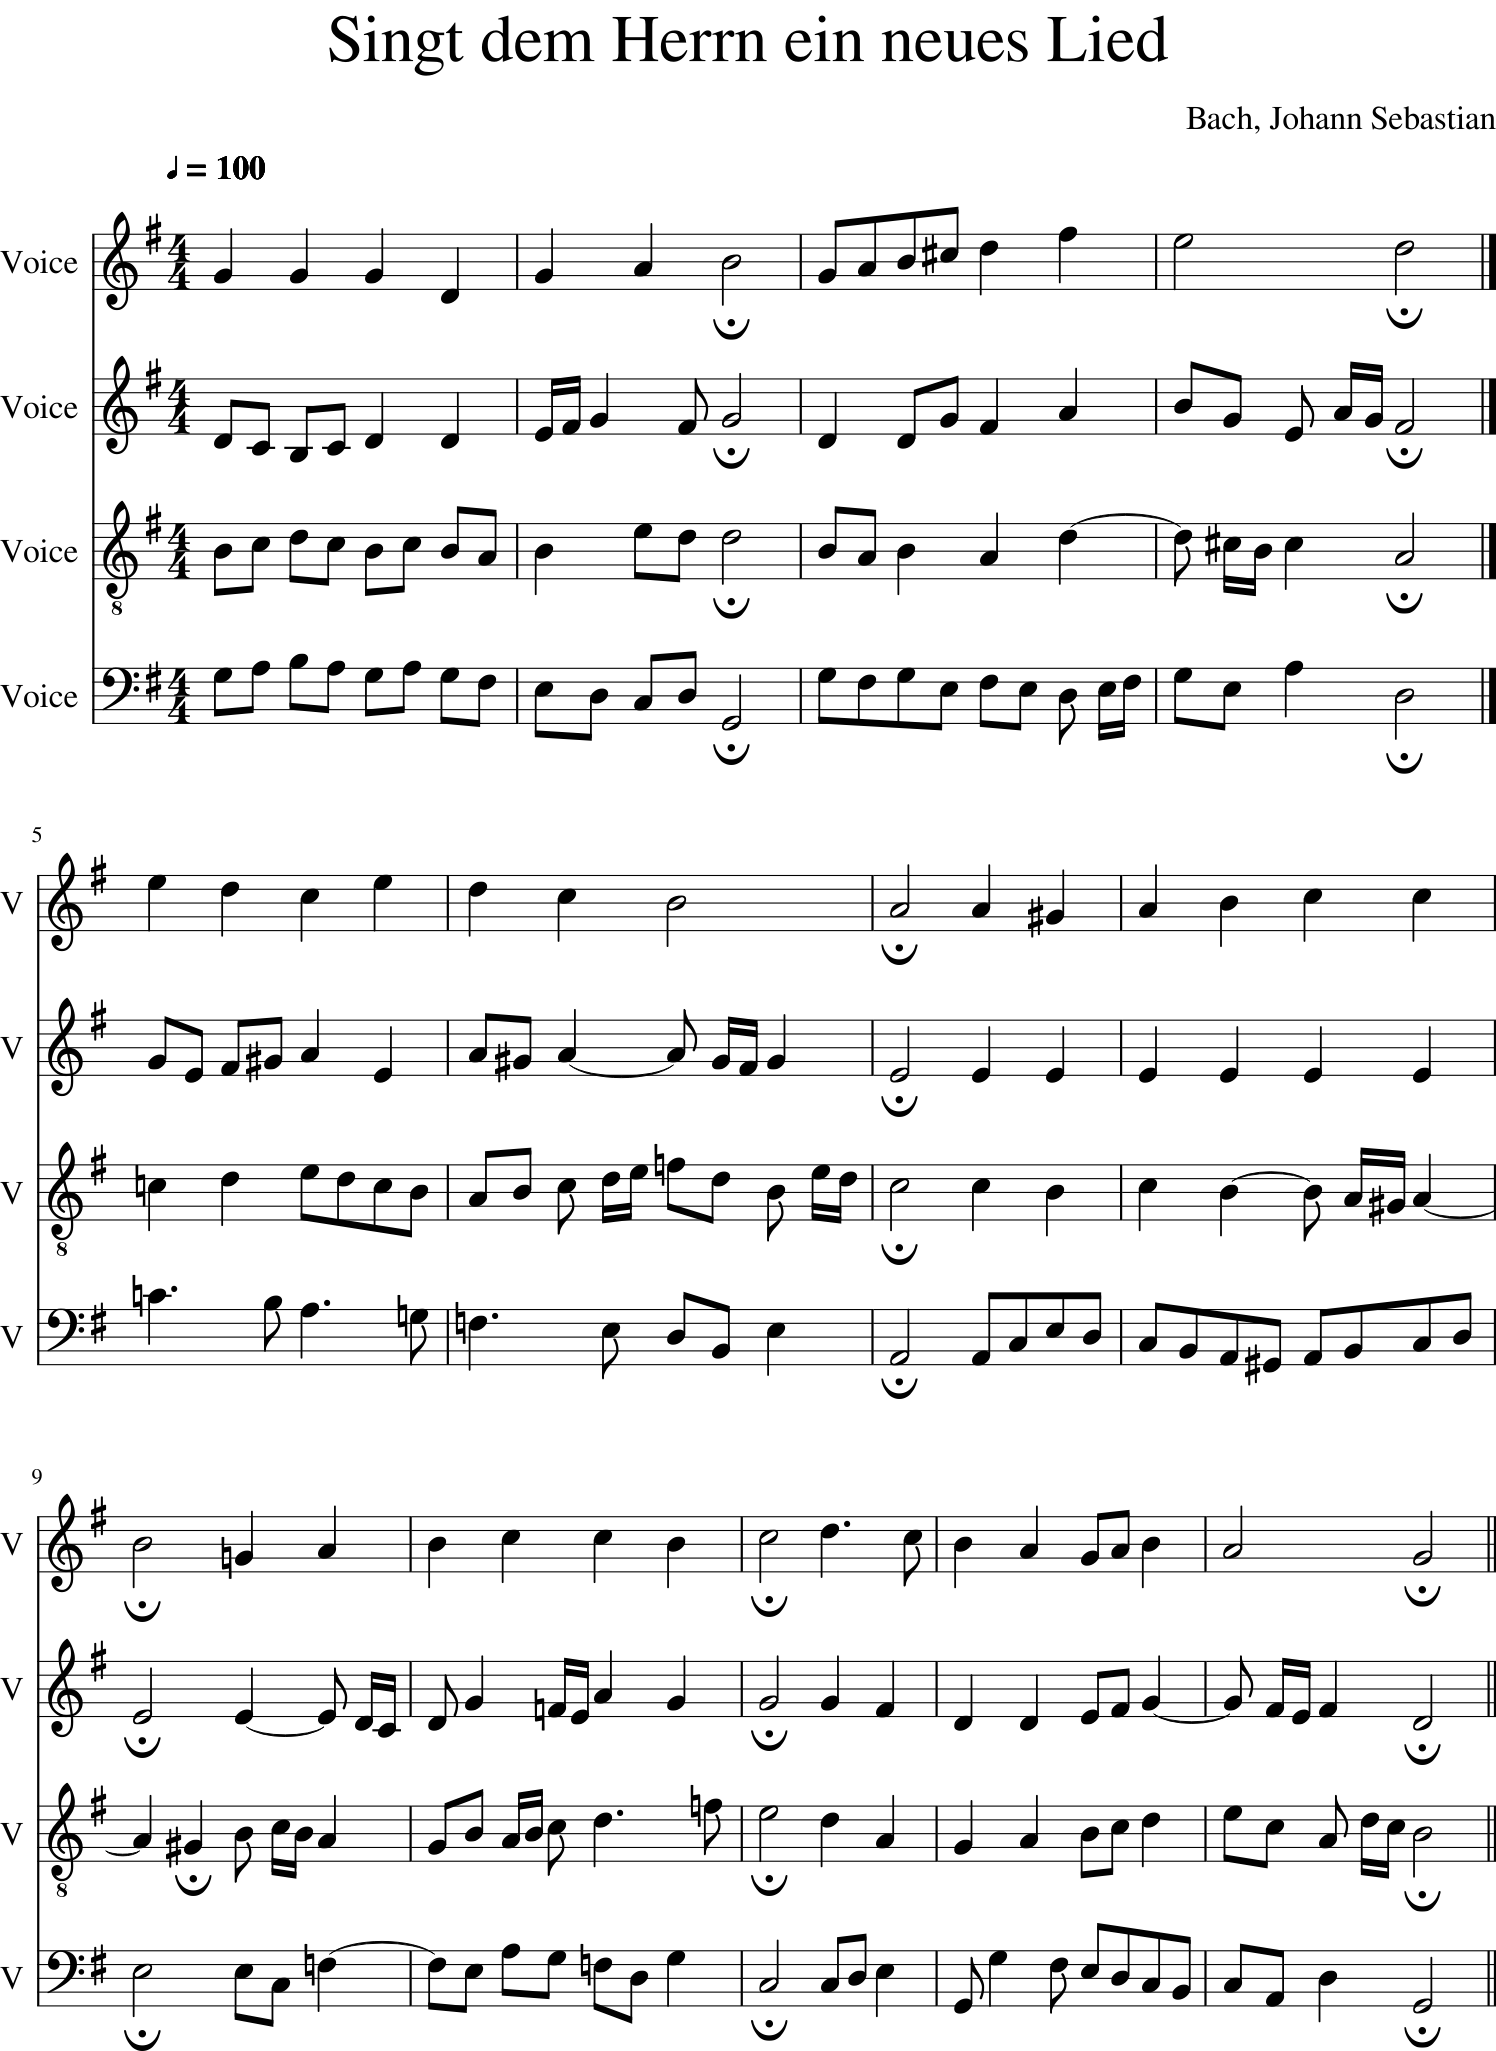

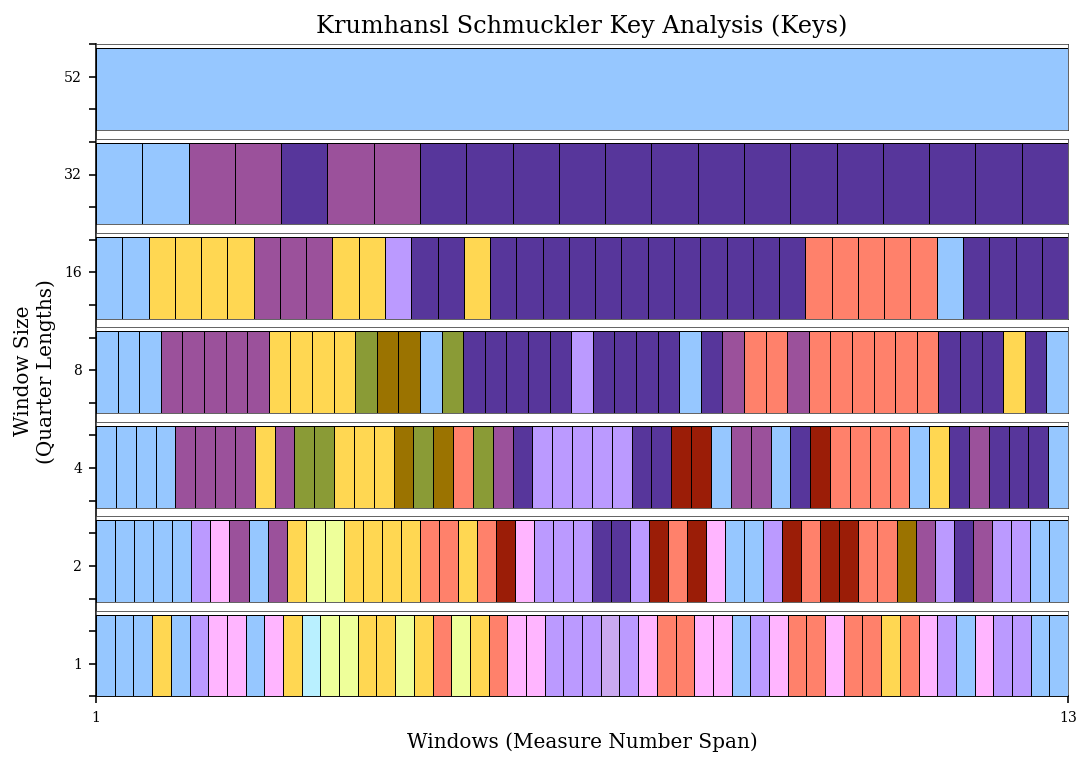

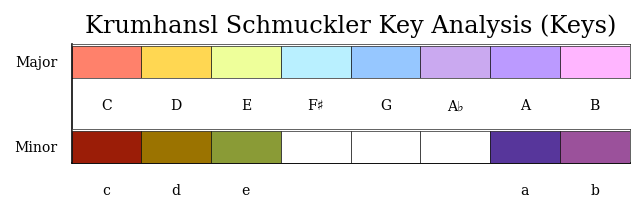

In [ ]:
from music21 import *
### parse the kern file into music21
s = converter.parse(chorales[2])
### grab the title so we know which piece we're looking at.
title = chorales[2].split("/")[-1]
### run the graph function
p = graph.plot.WindowedKey(s.parts[0])

#### Changing the algorithm used, if needed. Krumhansl-Schmuckler is the default.
# p.processorClass = analysis.discrete.AardenEssen
# p.processorClass = analysis.discrete.SimpleWeights
# p.processorClass = analysis.discrete.BellmanBudge
# p.processorClass = analysis.discrete.TemperleyKostkaPayne

### print the filename
print(title)
### show the score
s.show()
### show the windowed graph.
p.run()

#### What key would this be in?

This is where it might not be ideal to use key-finding algorithms that return only a single key. At least, it's worth considering what data we are actually getting when we're returned a single key.

If you'll remember the Krumhansl key-profiles, you'll see that the distributions weren't quite as flat as this:

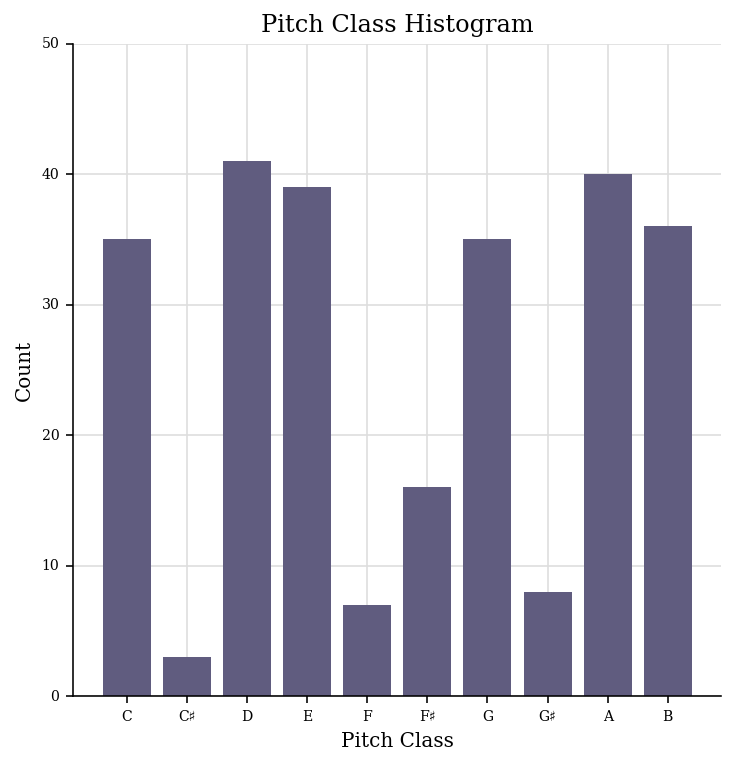

In [ ]:
s.plot('histogram', 'pitchClass')

So this one isn't clear-cut at all. It'd be nice if we could get some sort of confidence rating, when we're given a key.

In [ ]:
krum = analysis.discrete.KrumhanslKessler(s)
krum_key = krum.getSolution(s)

krum_key.correlationCoefficient

#krum_key.tonalCertainty()

1.0520793238500068

In [ ]:

print(krum_key, krum_key.correlationCoefficient)

for i in range(len(krum_key.alternateInterpretations)):
  alts = krum_key.alternateInterpretations[i]
  coef = krum_key.alternateInterpretations[i].correlationCoefficient
  print(f'{alts}\t\t{coef}')

G major 0.8220955623052668
e minor		0.7071036815328968
D major		0.6915984323029745
a minor		0.6681367682487972
C major		0.6226848764574211
b minor		0.47697058141988957
A major		0.4692361077911143
d minor		0.33786716648701903
E major		0.2390512268209518
g minor		0.1490354030345782
F major		0.13870670949376432
f# minor		0.06344415473148507
c minor		-0.011667841381644454
c# minor		-0.16500867361054888
B major		-0.1655989463136849
B- major		-0.28432119373106685
g# minor		-0.3239162077371817
f minor		-0.4626604806121342
E- major		-0.47798517393488266
F# major		-0.6217466388012528
A- major		-0.6267310263496465
e- minor		-0.6688721543673912
b- minor		-0.7704323977457653
C# major		-0.8069899360409593


### Looking at Confidence in the Chorales.

How would we look at the relative certainty of each key choice? 

We could print the correlation coefficient next to every key choice.

In [ ]:
import pandas as pd
from music21 import *
krum_kess = []
aarden_essen = []
temperley_kp = []
bellman_budge = []
sapp_weighted = []

titles = []
for file in chorales:
  titles.append(file.split("/")[-1])
  melody = converter.parse(file) 
 
  krum = analysis.discrete.KrumhanslKessler(melody)
  krum_key = krum.getSolution(melody)
  coef_krum = round(krum_key.correlationCoefficient, 3)
  krum_kess.append(f'{krum_key} ({coef_krum})')

  aarden = analysis.discrete.AardenEssen(melody)
  coef_aarden = round(aarden_key.correlationCoefficient, 3)
  aarden_key = aarden.getSolution(melody)
  aarden_essen.append(f'{aarden_key} ({coef_aarden})')
  
  bellman = analysis.discrete.BellmanBudge(melody)
  bellman_key = bellman.getSolution(melody)
  coef_bellman = round(bellman_key.correlationCoefficient, 3)
  bellman_budge.append(f'{bellman_key} ({coef_bellman})')

  sapp = analysis.discrete.SimpleWeights(melody)
  sapp_key = sapp.getSolution(melody)
  coef_sapp = round(sapp_key.correlationCoefficient, 3)
  sapp_weighted.append(f'{sapp_key} ({coef_sapp})')
  
  temperley = analysis.discrete.TemperleyKostkaPayne(melody)
  temperley_key = temperley.getSolution(melody)
  coef_temperley = round(temperley_key.correlationCoefficient, 3)
  temperley_kp.append(f'{temperley_key} ({coef_temperley})')

pd.set_option('max_rows', 371)
df = pd.DataFrame(list(zip(titles, krum_kess, aarden_essen, bellman_budge, sapp_weighted, temperley_kp)), columns= ['Chorale','Krumhansl-Kessler', 'Aarden-Essen', 'Bellman-Budge', 'Sapp Weighted', 'Temperley-KP'])
df

,Chorale,Krumhansl-Kessler,Aarden-Essen,Bellman-Budge,Sapp Weighted,Temperley-KP
0,chor264.krn,F major (0.896),B- major (0.915),B- major (0.925),B- major (0.927),B- major (0.907)
1,chor328.krn,G major (0.937),G major (0.892),G major (0.922),G major (0.945),G major (0.931)
2,chor246.krn,G major (0.822),G major (0.917),G major (0.888),G major (0.872),G major (0.887)
3,chor255.krn,D major (0.941),D major (0.911),D major (0.955),D major (0.978),D major (0.94)
4,chor018.krn,G major (0.889),G major (0.926),G major (0.97),G major (0.973),G major (0.939)
5,chor212.krn,B- major (0.893),E- major (0.922),E- major (0.965),E- major (0.957),E- major (0.942)
6,chor299.krn,E- major (0.937),E- major (0.928),E- major (0.941),E- major (0.955),E- major (0.967)
7,chor099.krn,a minor (0.796),a minor (0.951),a minor (0.901),a minor (0.952),a minor (0.887)
8,chor261.krn,e minor (0.795),e minor (0.924),e minor (0.867),e minor (0.913),e minor (0.865)
9,chor330.krn,D major (0.9),G major (0.948),G major (0.962),G major (0.936),G major (0.918)


## Exercise \#3

It would be really helpful to have a function that would provide the windowed keyscape of a certain piece, the score, and maybe the correlation coefficients of each key. What would that function look like?

In [ ]:
### your code here...

###k-k model.

### gradually make it more generalizable (and robust)


# p.processorClass = analysis.discrete.AardenEssen
# p.processorClass = analysis.discrete.SimpleWeights
# p.processorClass = analysis.discrete.BellmanBudge
# p.processorClass = analysis.discrete.TemperleyKostkaPayne


#### any piece (as an argument)

#### any key_finding algorithm.
